In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df=pd.read_csv('/content/drive/MyDrive/diamonds.csv')

In [7]:
df.head()

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [8]:
df.shape

(53940, 11)

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [11]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

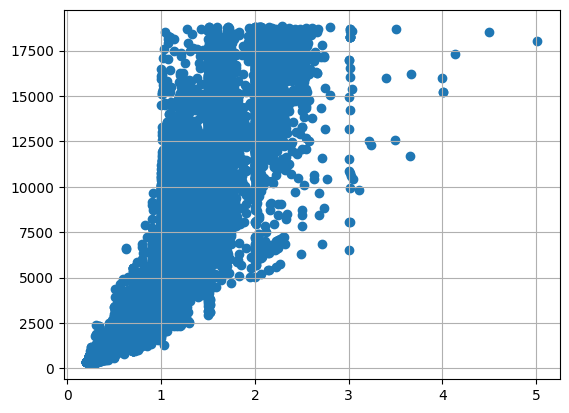

In [12]:
plt.grid(True)
plt.scatter(data=df,x='carat',y='price')

<Axes: xlabel='carat', ylabel='price'>

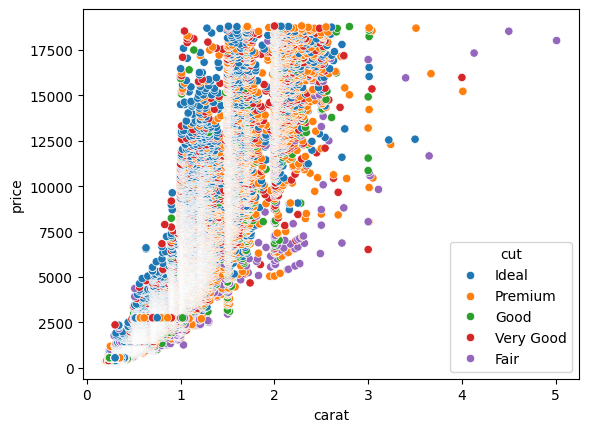

In [13]:
sns.scatterplot(data=df,x='carat',y='price',hue='cut')

In [14]:
import plotly.express as px
import plotly.graph_objects as go
px.scatter(data_frame = df, x="carat",
                    y="price", size="depth",
                    color= "cut", trendline="ols")

In [15]:
df['size']=df['x']*df['y']*df['z']

In [16]:
df.head()

carat      cut color clarity  depth  table  price     x     y     z  \
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43   
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31   
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31   
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63   
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75   

        size  
0  38.202030  
1  34.505856  
2  38.076885  
3  46.724580  
4  51.917250

<Axes: xlabel='size', ylabel='price'>

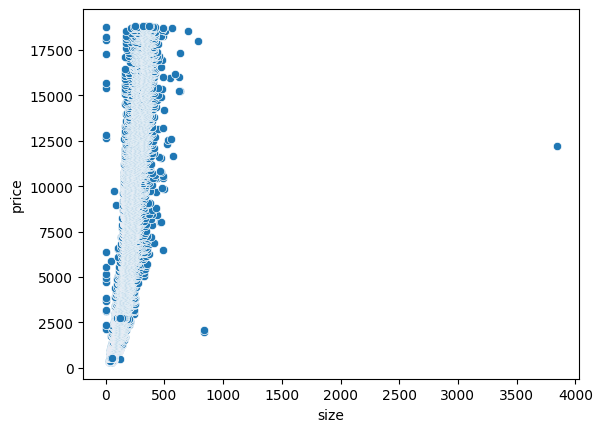

In [17]:
sns.scatterplot(data=df,x='size',y='price')

In [18]:
px.scatter(data_frame = df, x="size",
                    y="price", size="size",
                    color= "cut", trendline="ols")

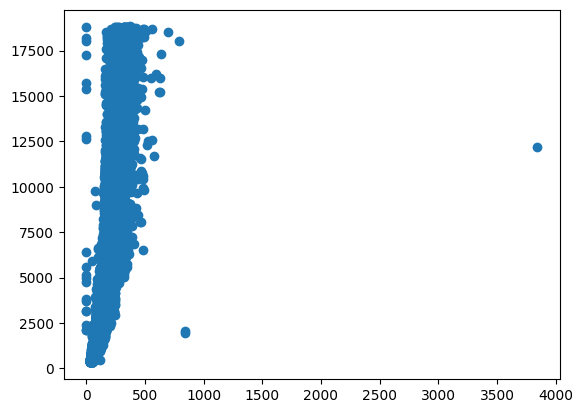

In [19]:
plt.scatter(data=df,x='size',y='price')

<Axes: xlabel='color', ylabel='price'>

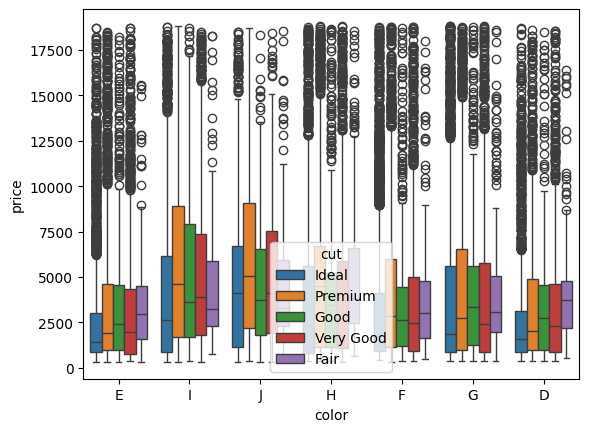

In [20]:
sns.boxplot(data=df,x='color',y='price',hue='cut')

In [21]:
px.box(df, x="cut",
             y="price",
             color="color")

<Axes: xlabel='cut', ylabel='price'>

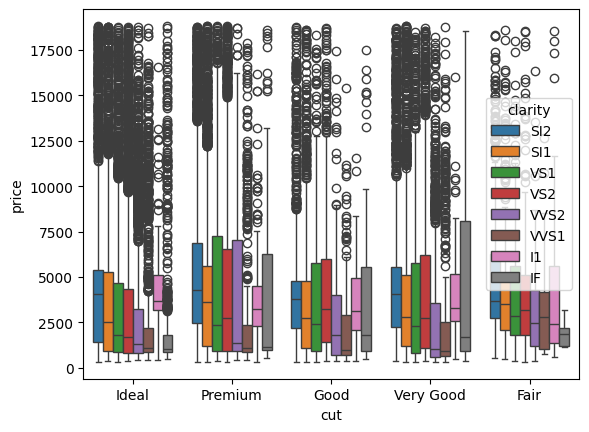

In [22]:
sns.boxplot(data=df,x='cut',y='price',hue='clarity')

In [27]:
df['cut'].value_counts()

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

In [28]:
df["cut"] = df["cut"].map({"Ideal": 1,
                               "Premium": 2,
                               "Good": 3,
                               "Very Good": 4,
                               "Fair": 5})

In [29]:
df.head()

carat  cut color clarity  depth  table  price     x     y     z       size
0   0.23    1     E     SI2   61.5   55.0    326  3.95  3.98  2.43  38.202030
1   0.21    2     E     SI1   59.8   61.0    326  3.89  3.84  2.31  34.505856
2   0.23    3     E     VS1   56.9   65.0    327  4.05  4.07  2.31  38.076885
3   0.29    2     I     VS2   62.4   58.0    334  4.20  4.23  2.63  46.724580
4   0.31    3     J     SI2   63.3   58.0    335  4.34  4.35  2.75  51.917250

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x=df[['carat','cut','size']]
y=df['price']

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=42)

In [33]:
from sklearn.ensemble import RandomForestRegressor

In [34]:
model=RandomForestRegressor()

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting the prices on the testing set
y_pred = model.predict(x_test)

# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)

# Printing the results
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 792.2405205871523
Mean Squared Error: 2014841.631357385
Root Mean Squared Error: 1419.4511725865689
R-squared: 0.8752148253053783


In [36]:
print("Diamond Price Prediction")
a = float(input("Carat Size: "))
b = int(input("Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): "))
c = float(input("Size: "))
features = np.array([[a, b, c]])
print("Predicted Diamond's Price = ", model.predict(features))

Diamond Price Prediction
Carat Size: 24
Cut Type (Ideal: 1, Premium: 2, Good: 3, Very Good: 4, Fair: 5): 1
Size: 38
Predicted Diamond's Price =  [13824.06]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

